In [1]:
## Following along with https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
## Using "Multivariate Multi-Step LSTM Models" Section

## Helpful links
## https://stackoverflow.com/questions/54354467/how-to-shape-large-dataframe-for-pythons-keras-lstm
## https://towardsdatascience.com/how-to-reshape-data-and-do-regression-for-time-series-using-lstm-133dad96cd00

In [38]:
import pandas as pd
import numpy as np
from pathlib import Path

from numpy import array
from numpy import hstack 

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import hvplot.pandas

import matplotlib.pyplot as plt

In [3]:
## Load pickle for exports and imports of data  
import pickle 
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def save_obj(obj, path ):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [4]:
## Load a dataset 
symbol = 'GME'

import_path = Path('../FilesExport_Complete_DFs_TI_noShift/'+symbol+'_TI_DF_no_shift.pkl')
import_data = load_obj(import_path)
dataframe = import_data[symbol]

#import_data

In [5]:
#dataframe.head()

In [6]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# ## Fit scaler
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# scaler.fit(y_train)
# y_train = scaler.transform(y_train)
# y_test = scaler.transform(y_test)

In [7]:
## Try changing length 
# len(dataframe) ## 1491

# split = 1400*0.7
# int(split)

dataframe = dataframe.tail(1400)

In [8]:
df = dataframe.copy()
df_close = df[['close']]
df = df.drop(columns=['close','adjClose'])

In [9]:
X = df
y = df_close
#X.head()

In [10]:
i = 0
for col in X.columns:
    i += 1
print(i) ## 20 features 

20


In [19]:
## Split data
split = int(0.7 * len(X)) + 1
x_train = X[: split]
x_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [20]:
len(x_train)

980

In [21]:
## Scale data 
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_sc = scaler_x.fit_transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [22]:
len(x_train_sc)

980

In [23]:
x_train_sc[0]

array([ 1.39777052,  1.38392754,  1.38695085, -0.43909168, -0.43909168,
       -1.14313672, -0.53211119,  1.37284382, -0.53211119, -0.01092989,
       -0.55213896, -0.22397642, -0.49751295, -0.41346139, -0.21884317,
       -0.38773641,  0.5345931 , -1.25439832,  1.30502731,  0.12478208])

In [24]:
20860/3

6953.333333333333

In [25]:
##  
num_steps = 5
input_dim = 20
output_dim = 1


# x_train_shaped = np.reshape(x_train_sc,newshape=(-1,num_steps,input_dim))

## It looks like a math thing - the length of the data likely needs to divide evenly (no decimals) for shaping
## to occur properly. Changing the length of the dataframe and data got the data to reshape. 

In [26]:
## Retry shaping 

## training set
x_train_shaped = np.reshape(x_train_sc, newshape=(-1, num_steps, input_dim))
y_train_shaped = np.reshape(y_train_sc, newshape=(-1, num_steps, output_dim))
assert x_train_shaped.shape[0] == y_train_shaped.shape[0]
## test set
x_test_shaped = np.reshape(x_test_sc, newshape=(-1, num_steps, input_dim))
y_test_shaped = np.reshape(y_test_sc, newshape=(-1, num_steps, output_dim))
assert x_test_shaped.shape[0] == y_test_shaped.shape[0]

In [27]:
## Attempt an LSTM Model 

In [28]:
model = Sequential()
model.add(LSTM(units=20, activation='tanh', input_shape=(num_steps, input_dim), return_sequences=True))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))
#adam = optimizers.Adam(lr=0.001)
model.compile(optimizer='adam', loss='mse')

In [32]:
model.fit(x_train_shaped, y_train_shaped, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0926
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0859
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0750
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0488


In [33]:
model.evaluate(x_test_shaped,y_test_shaped)

#test_predict = model.predict(x_test_shaped)

3/3 [==============================] - 0s 993us/step - loss: 222.4779


222.4778594970703

In [50]:
predicted = model.predict(x_test_shaped)
#predicted

In [51]:
#predicted_prices = scaler_y.inverse_transform(predicted)
real_prices = scaler_y.inverse_transform(y_test)

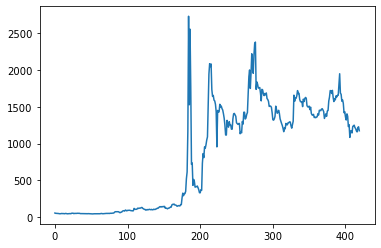

In [53]:
plt.plot(real_prices)